In [119]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

from sklearn.preprocessing import LabelEncoder, StandardScaler, PolynomialFeatures

from imblearn.over_sampling import SMOTE

from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.pipeline import make_pipeline

# from sklearn.ensemble import StackingClassifier, RandomForestClassifier
# from sklearn.linear_model import LogisticRegression
# from xgboost import XGBClassifier
# from lightgbm import LGBMClassifier
# from catboost import CatBoostClassifier

from sklearn.model_selection import RandomizedSearchCV, StratifiedKFold

from sklearn.metrics import (r2_score, f1_score, precision_score, recall_score, 
                             accuracy_score, roc_auc_score, confusion_matrix, 
                             classification_report, make_scorer)

warnings.filterwarnings("ignore")
df=pd.read_csv('RetailStoreProductSalesDataset.csv')
df.head()



,Unnamed: 0,price,discount,promotion_intensity,footfall,ad_spend,competitor_price,stock_level,weather_index,customer_sentiment,return_rate
0,0,45.197454,5.514259,4.062653,277.017484,2559.073870,44.255411,1176.981397,7.442194,1.021762,0.067388
1,1,49.327512,6.572035,4.964657,250.760714,2536.417155,50.331704,1219.359497,6.759510,0.975142,0.082719
2,2,47.328457,6.972713,4.363191,263.130478,2552.952356,49.285996,1263.822738,5.941689,0.871567,0.061600
3,3,50.964538,4.808234,3.577988,297.603918,2605.398826,46.839936,1182.435378,8.517014,1.071300,0.052215
4,4,44.530213,8.180216,4.966638,208.931691,2432.485683,45.336500,1178.513263,8.422473,1.068515,0.057975


In [120]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 11 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Unnamed: 0           15000 non-null  int64  
 1   price                15000 non-null  float64
 2   discount             15000 non-null  float64
 3   promotion_intensity  15000 non-null  float64
 4   footfall             15000 non-null  float64
 5   ad_spend             15000 non-null  float64
 6   competitor_price     15000 non-null  float64
 7   stock_level          15000 non-null  float64
 8   weather_index        15000 non-null  float64
 9   customer_sentiment   15000 non-null  float64
 10  return_rate          15000 non-null  float64
dtypes: float64(10), int64(1)
memory usage: 1.3 MB


In [121]:
df.drop('Unnamed: 0', inplace=True, axis=1)

In [122]:
df.describe()

,price,discount,promotion_intensity,footfall,ad_spend,competitor_price,stock_level,weather_index,customer_sentiment,return_rate
count,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000
mean,49.956732,6.837203,4.136523,239.445517,2504.998502,50.000493,1193.310305,7.598516,0.965801,0.063421
std,11.686149,3.733815,1.435314,46.325019,89.961407,12.333737,28.146760,2.032408,0.130758,0.017703
min,20.212604,0.000000,-1.049689,70.152377,2097.020336,16.656974,1083.677929,1.889509,-0.220674,0.000000
25%,41.289515,3.861480,3.288099,215.277581,2454.732256,40.924934,1174.319261,6.003253,0.897901,0.051708
50%,49.859890,6.813337,4.420697,251.341265,2518.736486,49.996544,1193.420041,7.602752,0.977009,0.063346
75%,58.659467,9.713206,5.227893,272.570188,2568.142658,58.859576,1212.020553,9.202837,1.049154,0.074673
max,79.248053,18.757707,6.966653,348.795219,2764.819228,85.804626,1301.090400,13.451735,1.347314,0.185994


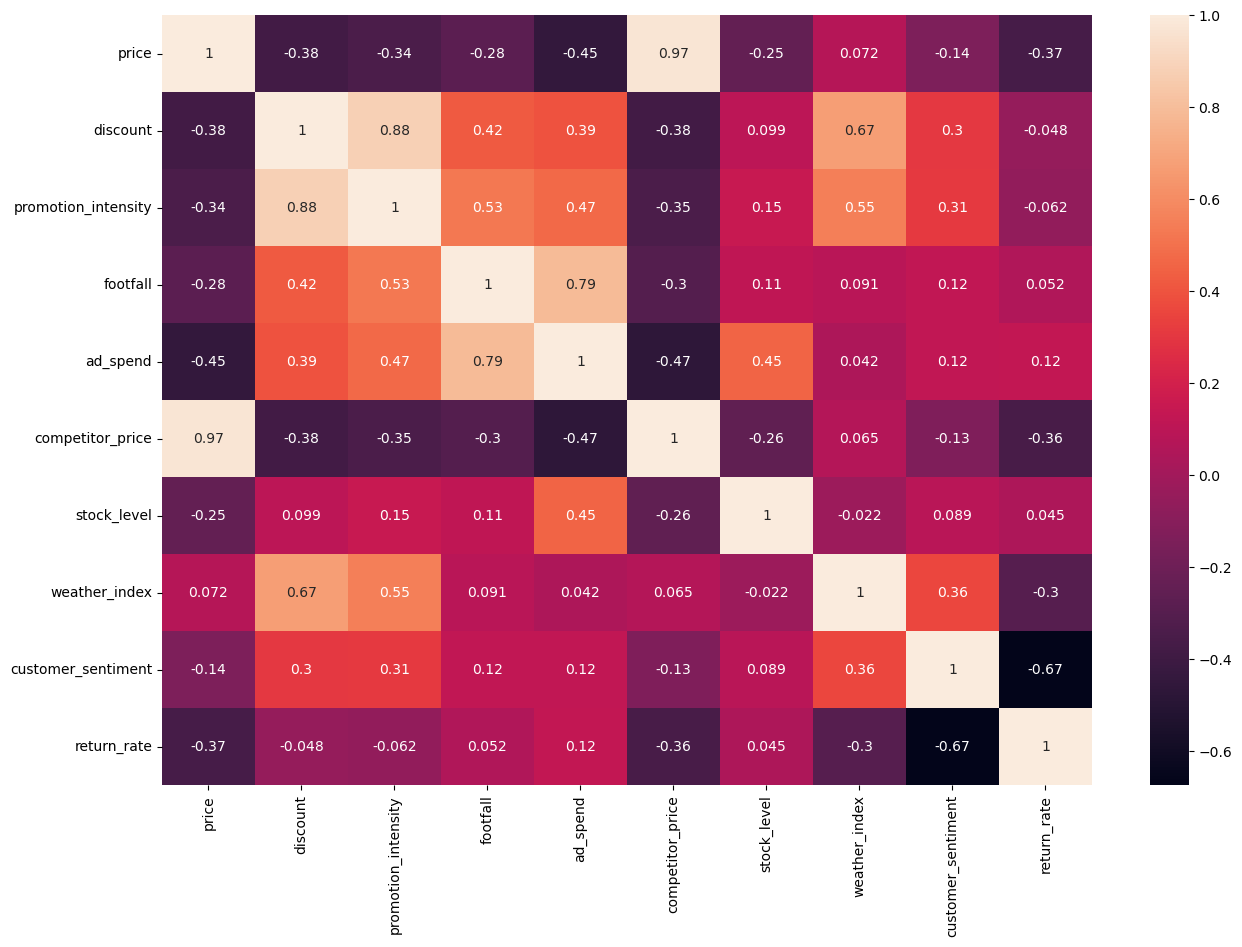

,price,discount,promotion_intensity,footfall,ad_spend,competitor_price,stock_level,weather_index,customer_sentiment,return_rate
price,1.000000,-0.384602,-0.340883,-0.280646,-0.447540,0.969183,-0.247371,0.071973,-0.138100,-0.366146
discount,-0.384602,1.000000,0.881456,0.419825,0.392287,-0.384028,0.099181,0.671021,0.303650,-0.047649
promotion_intensity,-0.340883,0.881456,1.000000,0.528194,0.471686,-0.346302,0.146227,0.554912,0.310091,-0.062459
footfall,-0.280646,0.419825,0.528194,1.000000,0.789288,-0.304304,0.114077,0.090699,0.121238,0.052372
ad_spend,-0.447540,0.392287,0.471686,0.789288,1.000000,-0.470384,0.454832,0.042321,0.119792,0.124195
competitor_price,0.969183,-0.384028,-0.346302,-0.304304,-0.470384,1.000000,-0.255409,0.065436,-0.132698,-0.357296
stock_level,-0.247371,0.099181,0.146227,0.114077,0.454832,-0.255409,1.000000,-0.022213,0.089119,0.044732
weather_index,0.071973,0.671021,0.554912,0.090699,0.042321,0.065436,-0.022213,1.000000,0.357600,-0.300116
customer_sentiment,-0.138100,0.303650,0.310091,0.121238,0.119792,-0.132698,0.089119,0.357600,1.000000,-0.673464
return_rate,-0.366146,-0.047649,-0.062459,0.052372,0.124195,-0.357296,0.044732,-0.300116,-0.673464,1.000000


In [123]:
corr = df.corr()
plt.figure(figsize=(15, 10))
sns.heatmap(corr, annot=True)
plt.show()
corr

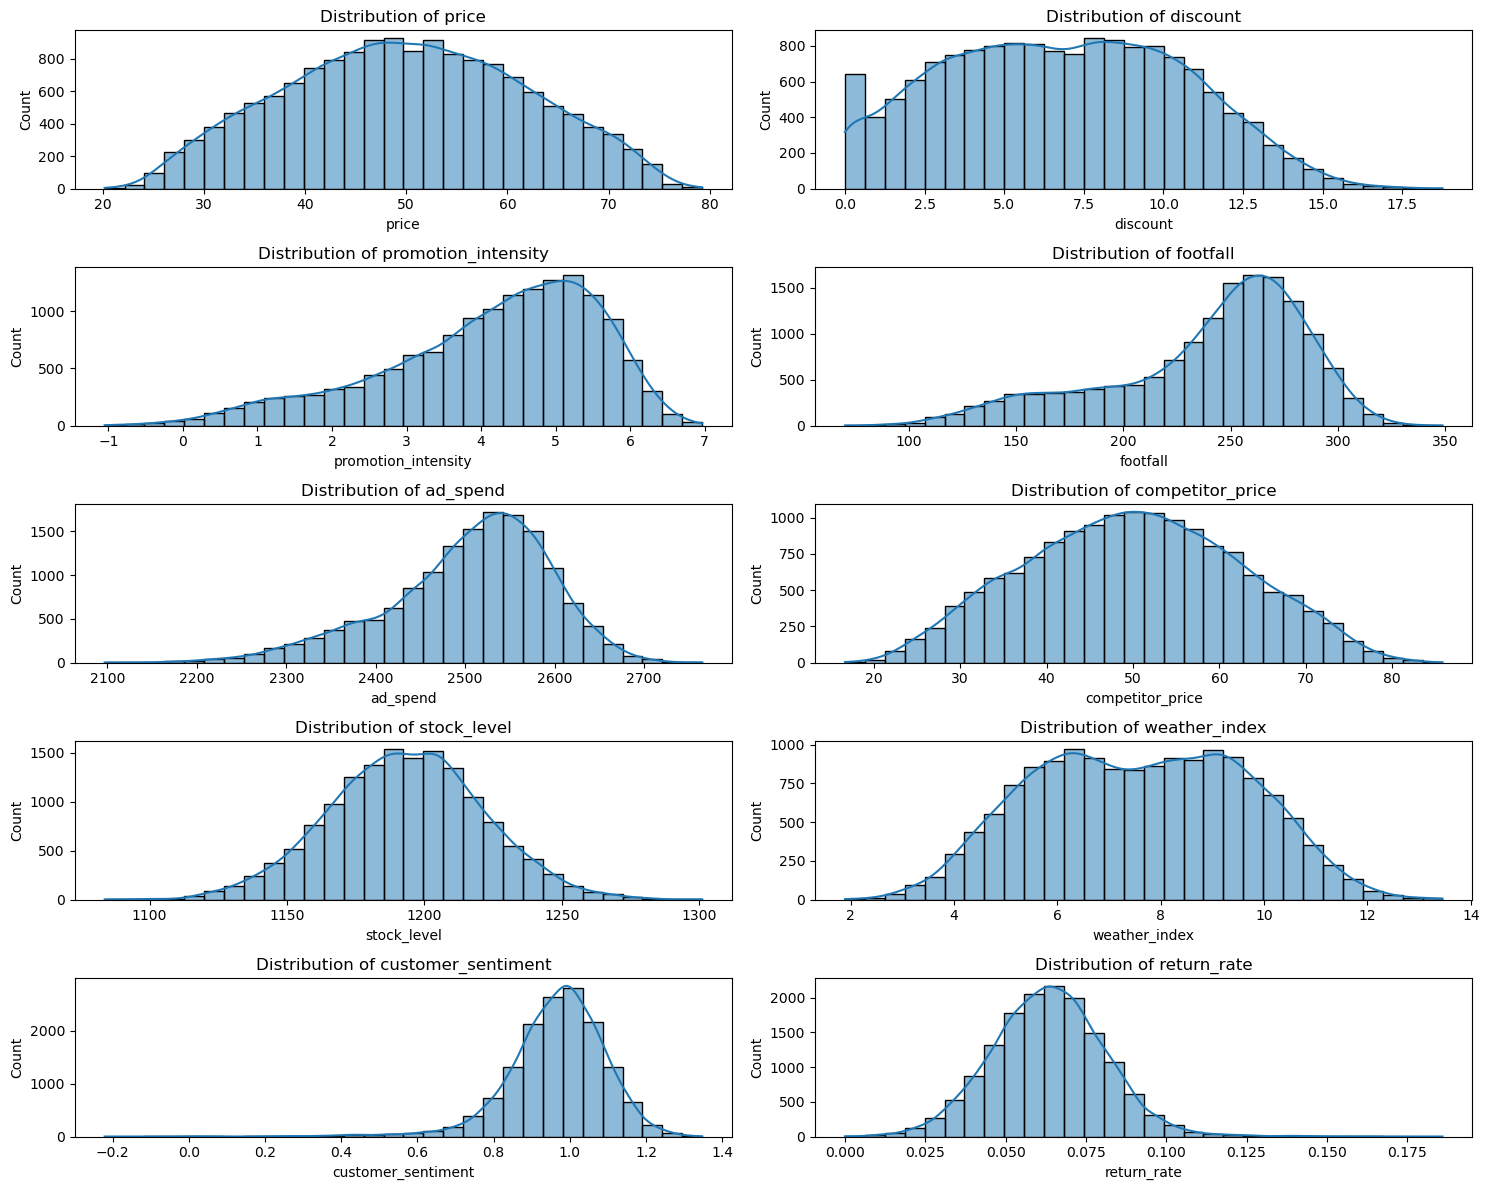

In [124]:
plt.figure(figsize=(15, 12))
for i, col in enumerate(df.columns, 1):
    plt.subplot(5, 2, i) 
    sns.histplot(df[col], kde=True, bins=30) 
    plt.title(f"Distribution of {col}")

plt.tight_layout()
plt.show()

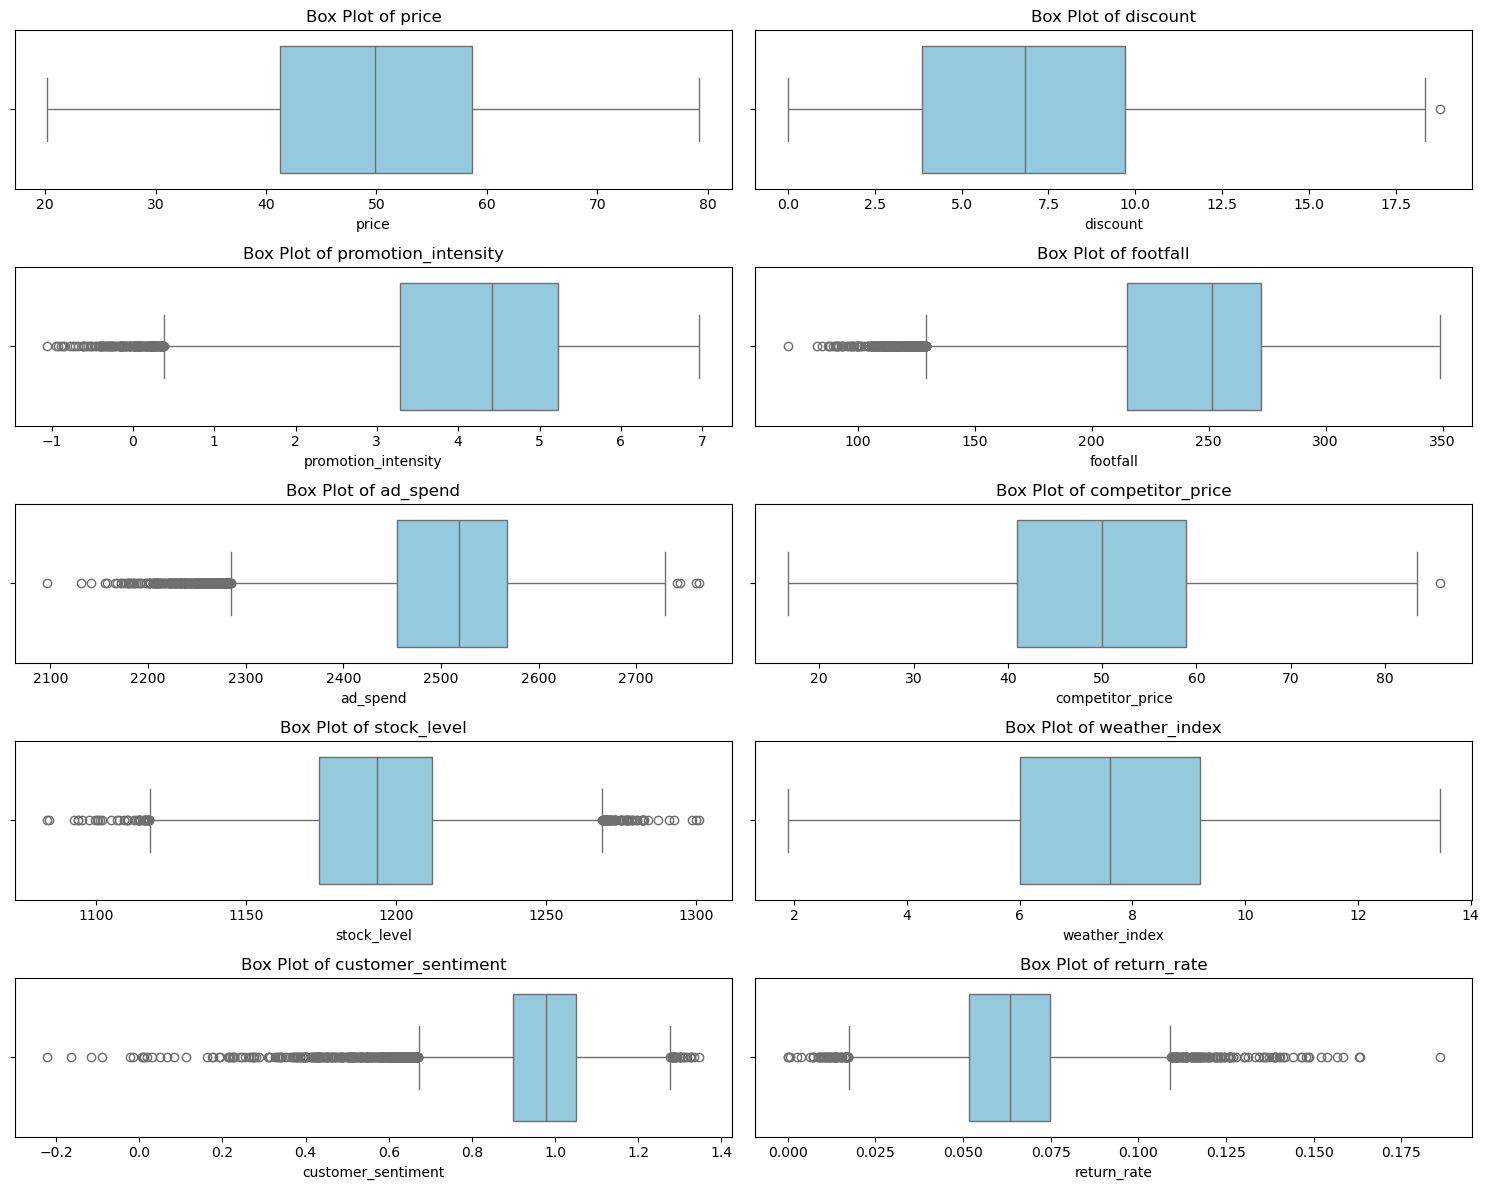

In [125]:
plt.figure(figsize=(15, 12))

for i, col in enumerate(df.columns, 1):
    plt.subplot(5, 2, i)  
    sns.boxplot(x=df[col], color="skyblue")
    plt.title(f"Box Plot of {col}")

plt.tight_layout()
plt.show()

In [126]:
for col in df.columns:
    print(col)
    print("Unique values:", df[col].unique())  
    print("Number of unique values:", len(df[col].unique())) 
    print("------------")


price
Unique values: [45.19745402 49.32751186 47.328457   ... 33.666624   39.03588458
 48.14446249]
Number of unique values: 15000
------------
discount
Unique values: [5.51425941 6.57203542 6.97271267 ... 8.73481799 9.6428379  5.62388721]
Number of unique values: 14625
------------
promotion_intensity
Unique values: [4.06265313 4.96465686 4.36319077 ... 4.51445508 5.25498556 4.41444588]
Number of unique values: 15000
------------
footfall
Unique values: [277.01748441 250.76071433 263.13047792 ... 273.09080806 198.130411
 256.9944184 ]
Number of unique values: 15000
------------
ad_spend
Unique values: [2559.07386982 2536.41715529 2552.95235573 ... 2492.52282767 2443.71191471
 2544.56444485]
Number of unique values: 15000
------------
competitor_price
Unique values: [44.25541114 50.33170381 49.28599559 ... 35.61756858 45.31798055
 44.96283264]
Number of unique values: 15000
------------
stock_level
Unique values: [1176.98139652 1219.3594971  1263.82273823 ... 1184.56509506 1206.8865740

In [127]:
import numpy as np
cols_to_cap = ['discount', 'promotion_intensity', 'footfall', 'ad_spend', 
               'competitor_price', 'stock_level', 'return_rate', 'customer_sentiment']


for col in cols_to_cap:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    df[col] = np.where(df[col] > upper_bound, upper_bound, df[col])
    df[col] = np.where(df[col] < lower_bound, lower_bound, df[col])


In [128]:
df[col] = np.log1p(df[col])

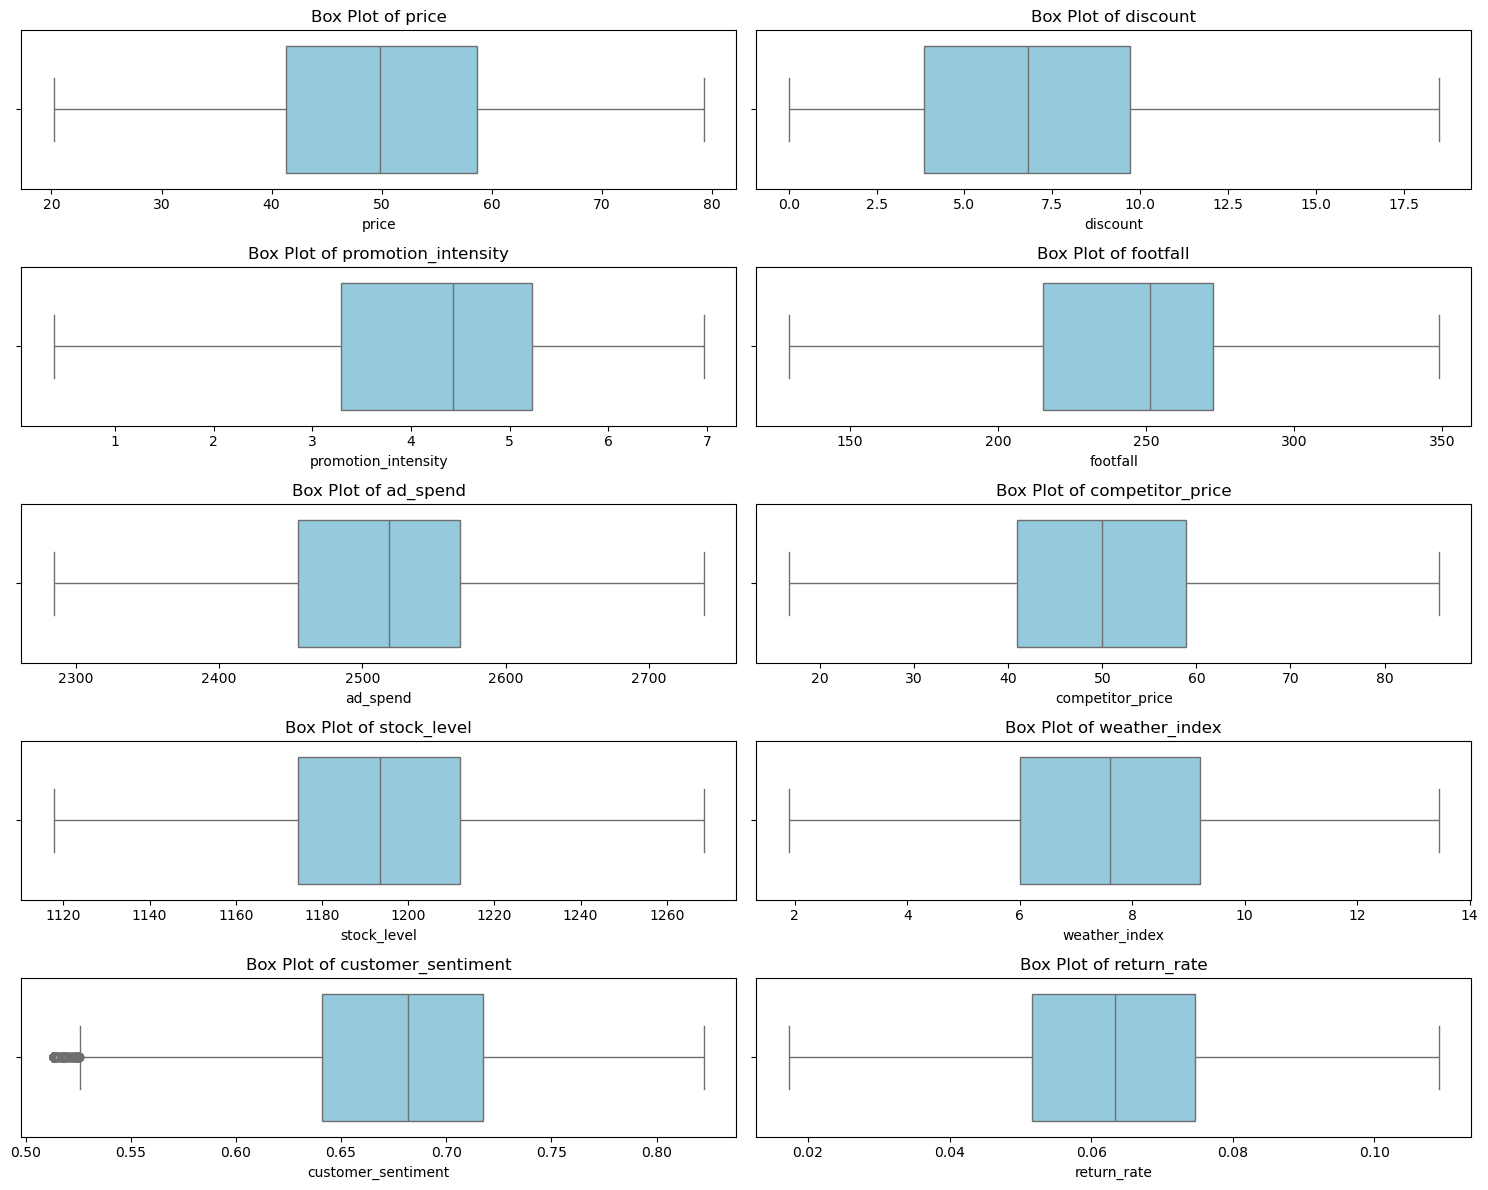

In [129]:
plt.figure(figsize=(15, 12))

for i, col in enumerate(df.columns, 1):
    plt.subplot(5, 2, i)  
    sns.boxplot(x=df[col], color="skyblue")
    plt.title(f"Box Plot of {col}")

plt.tight_layout()
plt.show()

In [130]:
col = 'customer_sentiment'
num_outliers = ((df[col] < lower_bound) | (df[col] > upper_bound)).sum()
print(num_outliers)


6416


In [131]:
x=df.drop('footfall',axis=1)
y=df['footfall']

In [132]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [133]:
x_train.shape

(12000, 9)

In [134]:
x_test.shape

(3000, 9)

In [135]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
model = LinearRegression()
model.fit(x_train, y_train)
y_pred = model.predict(x_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error:", mse)
print("R2 Score:", r2)


Mean Squared Error: 540.7721954345365
R2 Score: 0.7465286116631774


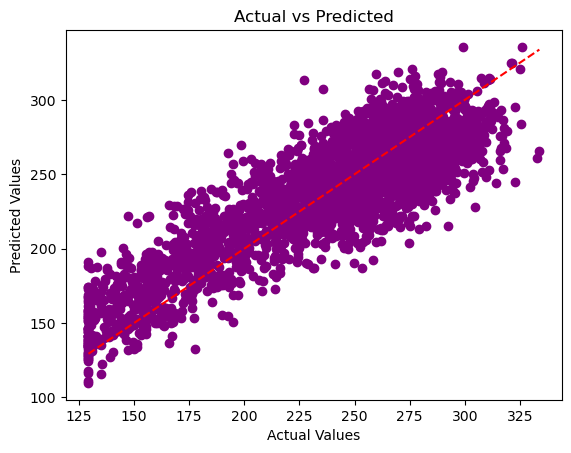

In [136]:
plt.scatter(y_test, y_pred, color='purple')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs Predicted')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], 'r--')  # خط 45 درجة
plt.show()


In [137]:
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

for d in range(2, 6):
    model = make_pipeline(PolynomialFeatures(d), LinearRegression())
    model.fit(x_train_scaled, y_train)
    y_test_pred = model.predict(x_test_scaled)
    y_train_pred = model.predict(x_train_scaled)
    print(f"Degree {d}: R² Train = {r2_score(y_train, y_train_pred):.3f}, R² Test = {r2_score(y_test, y_test_pred):.3f}")


Degree 2: R² Train = 0.770, R² Test = 0.774
Degree 3: R² Train = 0.802, R² Test = 0.802
Degree 4: R² Train = 0.816, R² Test = 0.798
Degree 5: R² Train = 0.840, R² Test = 0.759


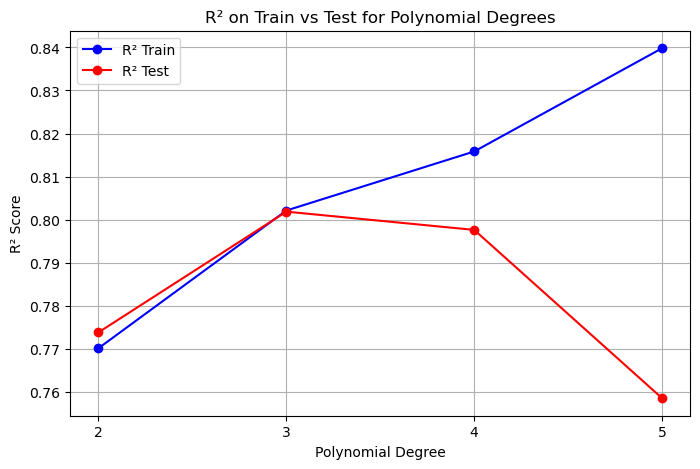

In [138]:
import matplotlib.pyplot as plt
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

degrees = range(2, 6)
r2_train_list = []
r2_test_list = []

for d in degrees:
    model = make_pipeline(PolynomialFeatures(d), LinearRegression())
    model.fit(x_train_scaled, y_train)
    y_train_pred = model.predict(x_train_scaled)
    y_test_pred = model.predict(x_test_scaled)
    r2_train_list.append(r2_score(y_train, y_train_pred))
    r2_test_list.append(r2_score(y_test, y_test_pred))

plt.figure(figsize=(8,5))
plt.plot(degrees, r2_train_list, marker='o', label='R² Train', color='blue')
plt.plot(degrees, r2_test_list, marker='o', label='R² Test', color='red')
plt.xlabel('Polynomial Degree')
plt.ylabel('R² Score')
plt.title('R² on Train vs Test for Polynomial Degrees')
plt.xticks(degrees)
plt.legend()
plt.grid(True)
plt.show()


In [139]:
from sklearn.tree import DecisionTreeRegressor

dt = DecisionTreeRegressor(random_state=42)
dt.fit(x_train_scaled, y_train)

y_train_pred = dt.predict(x_train_scaled)
y_test_pred = dt.predict(x_test_scaled)

print("Decision Tree:")
print("R² Train:", r2_score(y_train, y_train_pred))
print("R² Test:", r2_score(y_test, y_test_pred))


Decision Tree:
R² Train: 1.0
R² Test: 0.5753532121846265


In [140]:
from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(x_train_scaled, y_train)

y_train_pred = rf.predict(x_train_scaled)
y_test_pred = rf.predict(x_test_scaled)

print("Random Forest:")
print("R² Train:", r2_score(y_train, y_train_pred))
print("R² Test:", r2_score(y_test, y_test_pred))


Random Forest:
R² Train: 0.9699647581580433
R² Test: 0.7927321217676896


In [141]:
from sklearn.metrics import mean_squared_error

scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)

results = {}

models = {
    'Linear': LinearRegression(),
    'Ridge': Ridge(alpha=1.0),
    'Lasso': Lasso(alpha=0.1),
    'Polynomial (deg 3)': make_pipeline(PolynomialFeatures(degree=3), LinearRegression()),
    'Decision Tree': DecisionTreeRegressor(random_state=42),
    'Random Forest': RandomForestRegressor(n_estimators=100, random_state=42),
    'SVR': SVR(kernel='rbf')
}

for name, model in models.items():
    model.fit(x_train_scaled, y_train)
    
    y_train_pred = model.predict(x_train_scaled)
    y_test_pred = model.predict(x_test_scaled)
    
    r2_tr = r2_score(y_train, y_train_pred)
    r2_te = r2_score(y_test, y_test_pred)
    
    mse_tr = mean_squared_error(y_train, y_train_pred)
    mse_te = mean_squared_error(y_test, y_test_pred)
    
    results[name] = {
        'R2 Train': r2_tr, 
        'R2 Test': r2_te,
        'MSE Train': mse_tr,
        'MSE Test': mse_te
    }

print("Model Performance:")
print(f"{'Model':20} | {'R2 Train':8} | {'R2 Test':8} | {'MSE Train':10} | {'MSE Test':10}")
print("-"*70)
for model, metrics in results.items():
    print(f"{model:20} | {metrics['R2 Train']:.3f}   | {metrics['R2 Test']:.3f}   | {metrics['MSE Train']:.3f}     | {metrics['MSE Test']:.3f}")


Model Performance:
Model                | R2 Train | R2 Test  | MSE Train  | MSE Test  
----------------------------------------------------------------------
Linear               | 0.731   | 0.747   | 555.328     | 540.772
Ridge                | 0.731   | 0.747   | 555.328     | 540.772
Lasso                | 0.730   | 0.747   | 555.786     | 540.818
Polynomial (deg 3)   | 0.802   | 0.802   | 408.020     | 422.715
Decision Tree        | 1.000   | 0.575   | 0.000     | 905.969
Random Forest        | 0.970   | 0.793   | 61.933     | 442.199
SVR                  | 0.772   | 0.781   | 470.903     | 467.730


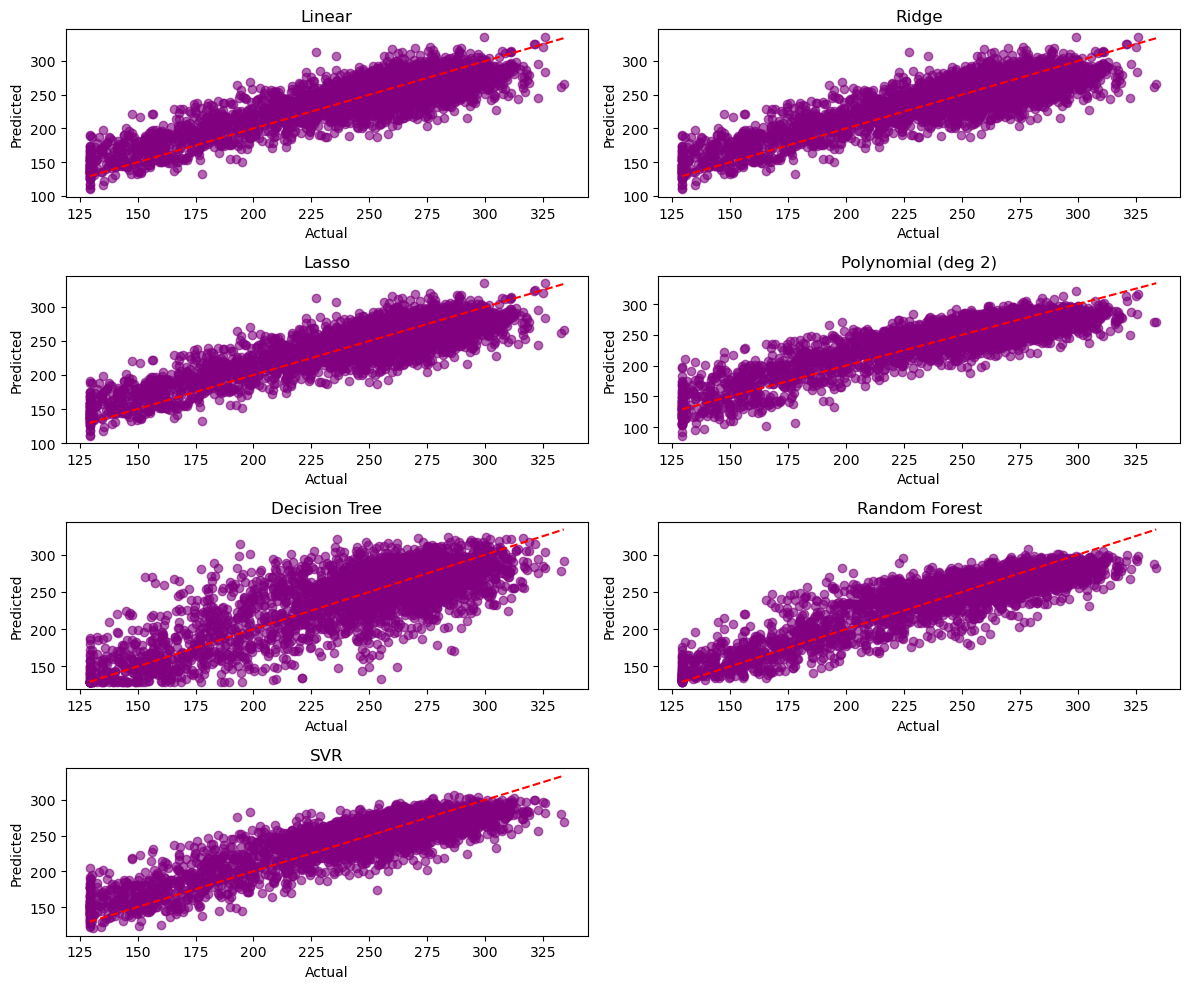

In [142]:
import matplotlib.pyplot as plt

models = {
    "Linear": lin,
    "Ridge": ridge,
    "Lasso": lasso,
    "Polynomial (deg 2)": poly2,
    "Decision Tree": dt,
    "Random Forest": rf,
    "SVR": svr
}

plt.figure(figsize=(12, 10))

for i, (name, model) in enumerate(models.items(), 1):
    y_test_pred = model.predict(x_test_scaled)
    plt.subplot(4, 2, i)
    plt.scatter(y_test, y_test_pred, color='purple', alpha=0.6)
    plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], 'r--')
    plt.xlabel("Actual")
    plt.ylabel("Predicted")
    plt.title(name)
    plt.tight_layout()

plt.show()


In [150]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import StandardScaler
import numpy as np

rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(x_train, y_train)

new_input = np.array([[49.3275118615309,6.57203541653068,4.964656859690898,2536.417155288061,50.331703810921,1219.359497103225,6.7595097300065685,0.9751419009453282,0.08271913078818333
]])


rf_prediction = rf.predict(new_input)
print("Predicted value (target) by Random Forest:", rf_prediction[0])


Predicted value (target) by Random Forest: 254.35359014884406


## predicted = 254 vs actual =250.76 GOOD!!